<a href="https://colab.research.google.com/github/Uluc/data_science_and_analytics/blob/main/heart_attack_death_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Load data set for global land tempratures based on country.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Check if any data is null

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Correlation Matrix

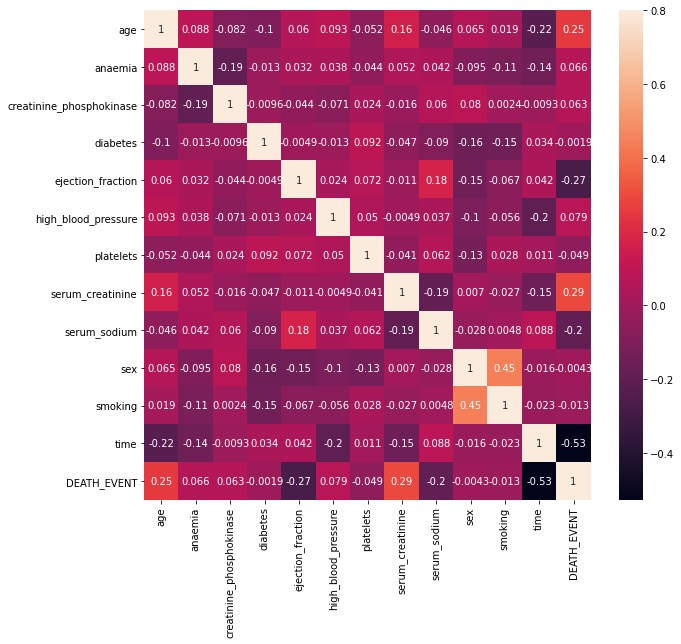

In [ ]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr_matrix, vmax=.8, annot=True);

In [ ]:
x = df.iloc[:, [0,4,7,8,11]].values  
y = df.iloc[:,-1].values

Setting test size at 20% and split data for training and testing purposes.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =123)

Normalize data to have mean of 0 stdv of 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

KNN From 3 to 10 Neighbors

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

for neighbors in range(3,12):
    model = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("K value: ",neighbors, " Accuracry Score: ", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(conf_matrix,'\n')

K value:  3  Accuracry Score:  0.8
Confusion Matrix:
[[31  4]
 [ 8 17]] 

K value:  4  Accuracry Score:  0.7333333333333333
Confusion Matrix:
[[31  4]
 [12 13]] 

K value:  5  Accuracry Score:  0.8333333333333334
Confusion Matrix:
[[31  4]
 [ 6 19]] 

K value:  6  Accuracry Score:  0.7666666666666667
Confusion Matrix:
[[32  3]
 [11 14]] 

K value:  7  Accuracry Score:  0.8
Confusion Matrix:
[[32  3]
 [ 9 16]] 

K value:  8  Accuracry Score:  0.8
Confusion Matrix:
[[33  2]
 [10 15]] 

K value:  9  Accuracry Score:  0.8166666666666667
Confusion Matrix:
[[32  3]
 [ 8 17]] 

K value:  10  Accuracry Score:  0.7833333333333333
Confusion Matrix:
[[32  3]
 [10 15]] 

K value:  11  Accuracry Score:  0.8
Confusion Matrix:
[[32  3]
 [ 9 16]] 



SVC accuracy using the C scores from 0.6 - 1.0 with 0.1 difference

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

print('SVC Accuracy Scores based on C ')

for c in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]:
    model = SVC(C = c, random_state=0, kernel = 'rbf')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Accuracy for C = ', c, 'is', accuracy_score(y_test,y_pred))
    print("Confusion Matrix:")
    print(conf_matrix,'\n')

SVC Accuracy Scores based on C 
Accuracy for C =  0.1 is 0.6
Confusion Matrix:
[[34  1]
 [23  2]] 

Accuracy for C =  0.2 is 0.8166666666666667
Confusion Matrix:
[[33  2]
 [ 9 16]] 

Accuracy for C =  0.3 is 0.85
Confusion Matrix:
[[33  2]
 [ 7 18]] 

Accuracy for C =  0.4 is 0.85
Confusion Matrix:
[[32  3]
 [ 6 19]] 

Accuracy for C =  0.5 is 0.85
Confusion Matrix:
[[32  3]
 [ 6 19]] 

Accuracy for C =  0.6 is 0.85
Confusion Matrix:
[[32  3]
 [ 6 19]] 

Accuracy for C =  0.7 is 0.85
Confusion Matrix:
[[32  3]
 [ 6 19]] 

Accuracy for C =  0.8 is 0.8333333333333334
Confusion Matrix:
[[32  3]
 [ 7 18]] 

Accuracy for C =  0.9 is 0.8333333333333334
Confusion Matrix:
[[32  3]
 [ 7 18]] 

Accuracy for C =  1.0 is 0.8166666666666667
Confusion Matrix:
[[31  4]
 [ 7 18]] 

Accuracy for C =  1.1 is 0.8166666666666667
Confusion Matrix:
[[31  4]
 [ 7 18]] 

Accuracy for C =  1.2 is 0.8166666666666667
Confusion Matrix:
[[31  4]
 [ 7 18]] 

